<h2>Amacım; yarış 2. si Max Verstappenin, eğer undercut yaptığında hard yerine medium lastik kullansaydı yarışı kazanabilir miydi sorusuna cevap vermek.

In [1]:
pip install fastf1

Note: you may need to restart the kernel to use updated packages.


In [2]:
import fastf1

In [3]:
fastf1.Cache.enable_cache('cache')  # Cache klasörü

In [4]:
#Buradan projenin yapıldığı tarih ile son yarış olan Suudi Arabistan GP Seçiyorum.
session = fastf1.get_session(2025, 'Sakhir', 'R')
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver 63: Lap timing integrity check failed for 3 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '63', '4', '16', '44', '1', '10', '31', '22', '87', '12', '23', '6', '7', '14', '30', '18', '

In [5]:
# Verstappen turlarını seçiyoruz.
laps_ver = session.laps.pick_driver('VER')
laps_ver = laps_ver[laps_ver['LapTime'].notnull()]

C:\Users\nurul\anaconda3\Lib\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [6]:
# Hard stint (9-24)
hard_stint = laps_ver[(laps_ver['LapNumber'] >= 10) &
                      (laps_ver['LapNumber'] <= 24)]

# Medium stint (25-56)
medium_stint = laps_ver[(laps_ver['LapNumber'] >= 25) &
                        (laps_ver['LapNumber'] <= 56)]

In [7]:
#Medium lastiğin ortalama süresi
avg_medium_lap = medium_stint['LapTime'].mean().total_seconds()
print(f"Ortalama Medium Süresi: {avg_medium_lap:.2f} saniye")

Ortalama Medium Süresi: 102.34 saniye


In [8]:
# hard stint kaç tur gidildi
num_hard_laps = len(hard_stint)

In [9]:
# Yeni toplam süre = gerçek tüm turlar - hard stint + simüle medium stint
total_time_actual = laps_ver['LapTime'].sum().total_seconds()
total_time_hard_stint = hard_stint['LapTime'].sum().total_seconds()

In [10]:
#simüle yarışta hem medium lastiğin ortalama süresini hem de simüle yarışın toplam süresini hesaplıyoruz
# burada hard stinti simülasyondan çıkartıyoruz. Sonra da simülasyon mediumla gittiği stinti ekliyoruz.
simulated_medium_total = avg_medium_lap * num_hard_laps
simulated_total_time = total_time_actual - total_time_hard_stint + simulated_medium_total

In [11]:
print(f"Gerçek Süre: {total_time_actual:.2f} saniye")
print(f"Simüle Edilmiş (Hard yerine Medium): {simulated_total_time:.2f} saniye")
print(f"Fark: {total_time_actual - simulated_total_time:.2f} saniye")

Gerçek Süre: 5773.83 saniye
Simüle Edilmiş (Hard yerine Medium): 5802.28 saniye
Fark: -28.45 saniye


<h5>Hard yerine medium lastik kullanılsaydı yarışı 28.45 saniye daha yavaş götürücekti. Yani Red Bull takımı pitstop stratejilerinde, elimizdeki kullanabileceğimiz verilere göre ve bu verilerin analizine göre doğru karar vermiş. 

In [13]:
# Hard ve Medium stintleri
hard_stint = laps_ver[(laps_ver['Compound'] == 'HARD') & (laps_ver['LapTime'].notnull())]
medium_stint = laps_ver[(laps_ver['Compound'] == 'MEDIUM') & (laps_ver['LapTime'].notnull())]

# Ortalama süreler (saniye olarak)
avg_hard_lap = hard_stint['LapTime'].mean().total_seconds()
avg_medium_lap = medium_stint['LapTime'].mean().total_seconds()

print(f"Ortalama Hard Süresi:   {avg_hard_lap:.2f} saniye")
print(f"Ortalama Medium Süresi: {avg_medium_lap:.2f} saniye")

# Fark
lap_diff = avg_hard_lap - avg_medium_lap
if(lap_diff < 0):
    lap_diff = lap_diff * (-1)
    print(f"Medium, Hard'dan ortalama {lap_diff:.2f} saniye daha yavaş")
else:
    print(f"Medium, Hard'dan ortalama {lap_diff:.2f} saniye daha hızlı")



Ortalama Hard Süresi:   100.33 saniye
Ortalama Medium Süresi: 102.28 saniye
Medium, Hard'dan ortalama 1.94 saniye daha yavaş


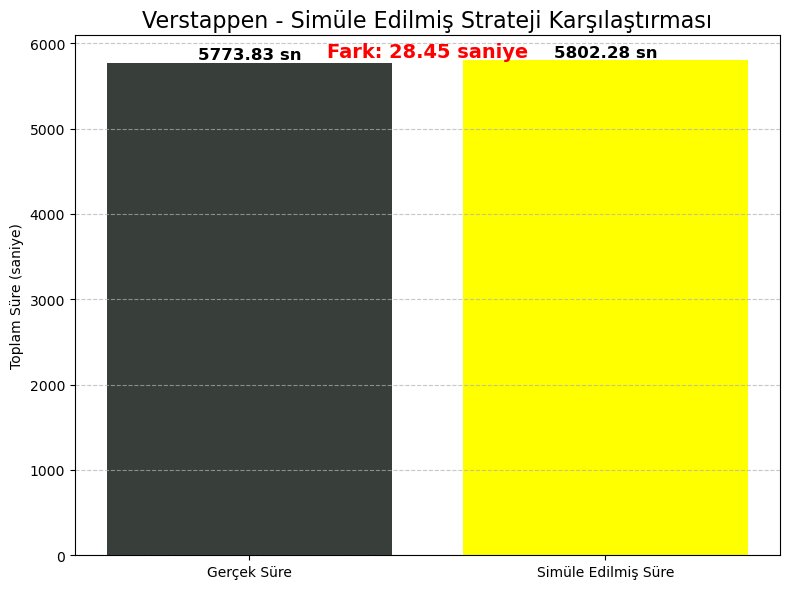

In [39]:
import matplotlib.pyplot as plt

difference = simulated_total_time - total_time_actual

# Veriler
labels = ['Gerçek Süre', 'Simüle Edilmiş Süre']
values = [total_time_actual, simulated_total_time]
colors = ['#383e39', '#FFFF00']  # sarı ve antrasit gri

# Grafik oluşturma
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=colors)

# Barların üstüne değer yazdırma
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             yval + 5,
             f'{yval:.2f} sn',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Fark metni
plt.text(0.5, max(values) + 40,
         f"Fark: {difference:.2f} saniye",
         ha='center', fontsize=14, fontweight='bold', color='red')

# Ayarlar
plt.title("Verstappen - Simüle Edilmiş Strateji Karşılaştırması", fontsize=16)
plt.ylabel("Toplam Süre (saniye)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

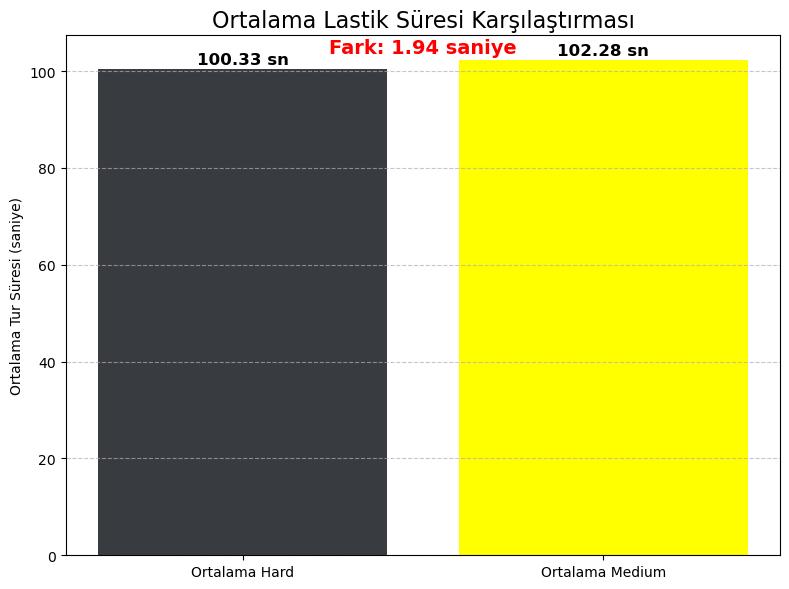

In [43]:
diff_avg = avg_medium_lap - avg_hard_lap

# Bar chart verileri
labels = ['Ortalama Hard', 'Ortalama Medium']
values = [avg_hard_lap, avg_medium_lap]
colors = ['#383b40', '#FFFF00']  # Mavi ve yeşil

# Grafik oluştur
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=colors)

# Bar üstlerine süre yaz
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             yval + 0.5,
             f'{yval:.2f} sn',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Fark yazısı
plt.text(0.5, max(values) + 1.5,
         f"Fark: {diff_avg:.2f} saniye",
         ha='center', fontsize=14, fontweight='bold', color='red')

# Ayarlar
plt.title("Ortalama Lastik Süresi Karşılaştırması", fontsize=16)
plt.ylabel("Ortalama Tur Süresi (saniye)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
